## Twin Classification

### 1. Install Packages and Libraries

In [ ]:
!pip install requirements.txt

In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# To import and transform images 
from keras.preprocessing import image_dataset_from_directory

# To build the NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# To save the model
from tensorflow.keras.models import load_model

## 2. Access Image data in data folder

In [3]:
batchsize=2
data_directory = "data"
data = image_dataset_from_directory(data_directory, batch_size=batchsize)

Found 23 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(2, 256, 256, 3)

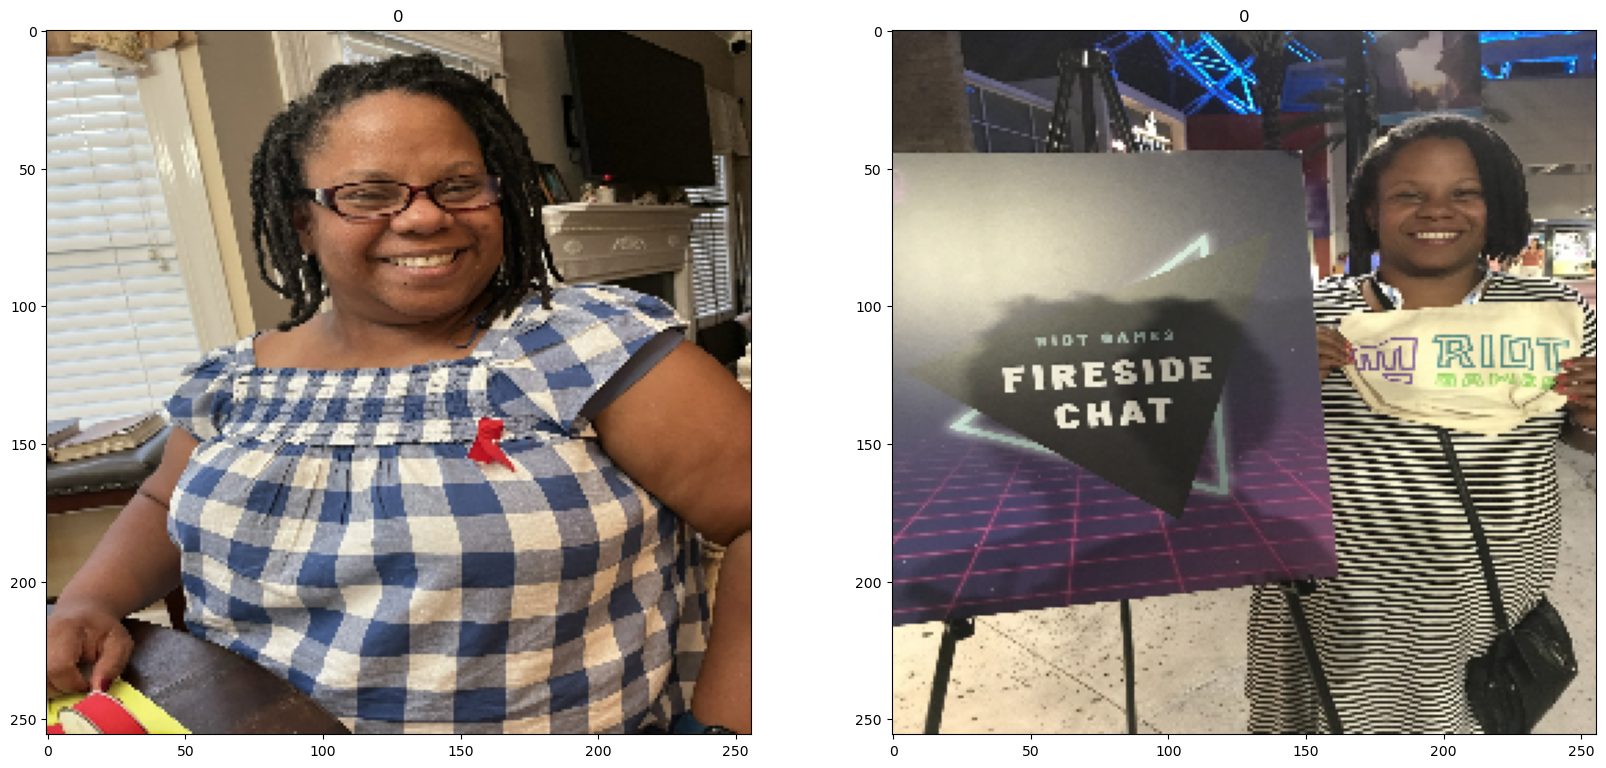

In [5]:
fig, ax = plt.subplots(ncols=batchsize, figsize=(20,20))
for idx, img in enumerate(batch[0][:batchsize]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Kisha images are classified as 0 and Kym images are classified as 1

## 3. Scale and Split the Data

In [6]:
# Scale the data
data = data.map(lambda x,y: (x/255,y))

#Split Data
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)+1
print(f"Training: {train_size}, Validation: {val_size}, Test: {test_size}")

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Training: 7, Validation: 3, Test: 3


## 4. Build the Deep Learning Model

In [7]:
# Input Layer, 2 Convolutional Hidden Layers, a Flatten and Dense Layer and Output Layer 
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 5. Train The model

In [10]:
# for Logging
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# fitting the model with the training data
hist = model.fit(train, epochs=10, validation_data=val, callbacks =[tensorboard_callback])


Epoch 1/10
7/7 [==============================] - 1s 65ms/step - loss: 0.7193 - accuracy: 0.6429 - val_loss: 1.1614 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 54ms/step - loss: 0.7036 - accuracy: 0.5714 - val_loss: 0.7364 - val_accuracy: 0.3333
Epoch 3/10
7/7 [==============================] - 0s 52ms/step - loss: 0.6404 - accuracy: 0.6429 - val_loss: 0.5928 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 0s 54ms/step - loss: 0.6351 - accuracy: 0.5714 - val_loss: 0.5655 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 0s 51ms/step - loss: 0.4539 - accuracy: 0.7857 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 51ms/step - loss: 0.3059 - accuracy: 0.9286 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 57ms/step - loss: 0.1284 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===========

## 6. Model Analysis

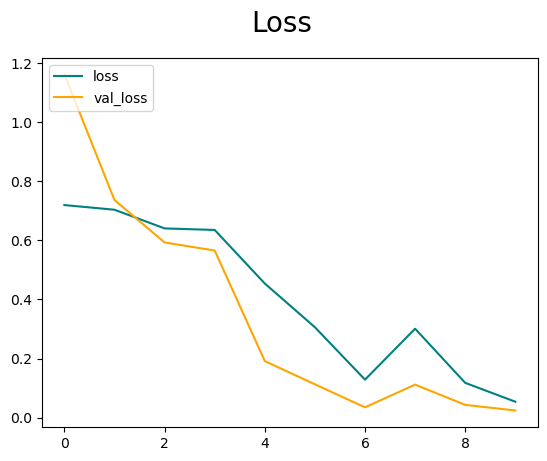

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


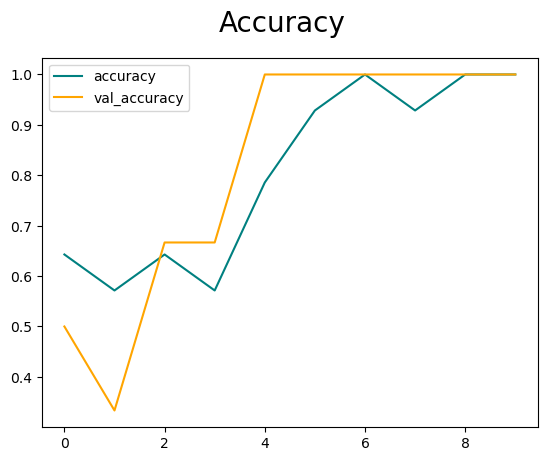

In [12]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Test model with unseen data

In [21]:
def test_image(image_file):
    img = cv2.imread(image_file)
    # Resize image to the input size of 256 x 256
    resized_image = tf.image.resize(img, (256,256))
    
    # Plot image
    plt.imshow(resized_image.numpy().astype(int))
    plt.show()
    
    # Scale image then add it to array of images since model uses batch images as input
    yhat = model.predict(np.expand_dims(resized_image/255, 0))
    
    if yhat > 0.5: 
        print(f'Predicted image is Kym: {yhat}')
    else:
        print(f'Predicted image is Kisha: {yhat}')

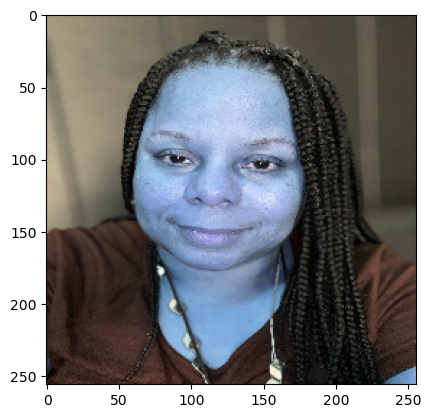

1/1 [==============================] - 0s 38ms/step
Predicted image is Kisha: [[0.00031553]]


In [22]:
test_image('IMG_1342.JPEG')

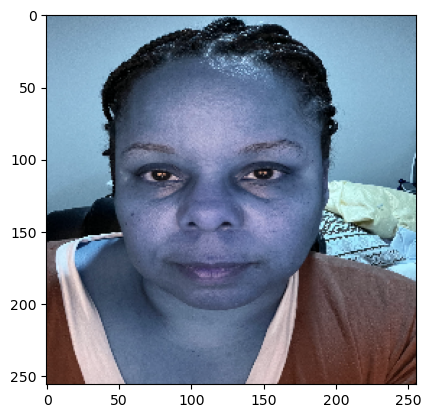

1/1 [==============================] - 0s 20ms/step
Predicted image is Kisha: [[0.00120415]]


In [23]:
test_image('IMG_1973.jpg')

## 7. Save and Register the Model

In [13]:
# Save the model
model.save(os.path.join('models', 'twinclassifier.h5'))
#model.save('twinclassifier.keras')

/Users/kymair/anaconda3/envs/tf213/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Register the model to the workspace
#model = run.regster_model(model_name='twin_classifier', model_path='./models/twinclassifier.h5')
#print(model.name, model.id, model.version, sep='\t')

## Create a requirements file based on notebook dependencies

In [14]:
!pip install session-info

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=a78f9d1ad260c9136af6e69f6e8a68389616949f969d1e5a083dd39399475d96
  Stored in directory: /Users/kymair/Library/Caches/pip/wheels/d4/fc/2e/00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info
